In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [3]:
df = pd.read_csv('./data/sample_positive_emotion.csv')
df

,ad,pos_emo
0,see why everyone is celebrating at hoblit dodg...,1
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,1
3,we have until march 31st to raise money for ou...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
120,blood donation saves lives\nthis cannot be sai...,0
121,over 10000 palestinians have been forced left ...,0
122,palestine emergency appeal 53 palestinians inc...,0
123,let is build cameroon wake up cameroonians and...,1


In [5]:
# creating prediction model

# creating the filters 
filters =  [  'advantage', 'delighted', 'ecstatic', 'effective', 'freedom', 'guaranteed', 'relaxed', 'assured', 'happy', 'healthy',
                 'fulfilled', 'genuine', 'authentic','sure', 'secure', 'stable', 'honest', 'truthful','supportive', 'excellent', 'responsible', 
                'blissful', 'joyous', 'delighted', 'guarantee', 
                 'overjoyed', 'gleeful', 'thankful', 'festive', 'ecstatic', 'satisfied', 'cheerful','sunny', 'elated', 'jubilant', 
                 'jovial', 'fun-loving', 'lighthearted', 'glorious', 'innocent', 'child-like', 'gratified', 'euphoric', 'playful', 
                 'courageous', 'energetic', 'liberated', 'optimistic', 'frisky', 'animated', 'spirited','thrilled', 'wonderful', 'funny', 
                 'intelligent', 'exhilarated', 'spunky', 'youthful', 'vigorous', 'tickled', 'creative', 'constructive', 
                  'comfortable', 'pleased', 'encouraged', 'surprised', 'content', 'serene', 'bright', 'blessed', 'vibrant', 
                 'bountiful','glowing','relaxing','pleasing','fulfilling','good quality','compassion','astonished','glad','appreciative', 'joyful', 'pleased', 
                 'confident', 'cheery', 'polite', 'chilly','glory','brave', 'heroic', 'enthusiastic', 'passionate','optimistic','delighted', 'excited', 'amazing','amusing',
                  'innovative', 'artistic','authentic' 'supportive', 'excellent','blissful', 'joyous', 'delighted', 'overjoyed', 'gleeful', 'thankful'
            ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.736
                     precision    recall  f1-score   support

no positive emotion       0.81      0.87      0.84        98
   positive emotion       0.35      0.26      0.30        27

           accuracy                           0.74       125
          macro avg       0.58      0.56      0.57       125
       weighted avg       0.71      0.74      0.72       125

confusion matrix:
[[85 13]
 [20  7]]



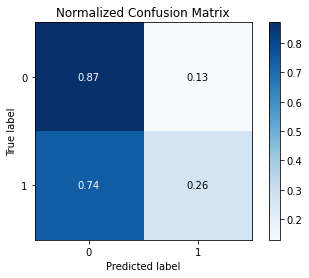

In [6]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['pos_emo'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['pos_emo'], y_pred, target_names=['no positive emotion', 'positive emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['pos_emo'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['pos_emo'], y_pred, normalize=True)
plt.show()